In [1]:
# Vanishing Gradient Problem - Visual Demonstration

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print("=" * 60)
print("VANISHING GRADIENT DEMONSTRATION")
print("=" * 60)

VANISHING GRADIENT DEMONSTRATION


In [2]:
# ==============================================================================
# SECTION 1: Simple Multiplication - The Core Problem
# ==============================================================================

print("\n1. REPEATED MULTIPLICATION EXPERIMENT")
print("-" * 60)

def compute_repeated_multiplication(W, num_steps):
    """Simulate gradient flow: gradient = W^num_steps"""
    results = []
    current = 1.0
    for step in range(num_steps):
        current *= W
        results.append(current)
    return results

# Test different weight values
num_steps = 50
weight_values = [0.9, 0.95, 1.0, 1.05, 1.1]

print(f"Starting gradient: 1.0")
print(f"Number of steps: {num_steps}\n")

for W in weight_values:
    final_value = W ** num_steps
    
    if W < 1:
        status = "VANISHING"
    elif W > 1:
        status = "EXPLODING"
    else:
        status = "STABLE"
    
    print(f"W = {W:.2f}: {final_value:.6f}  {status}")

print("\nKEY INSIGHT: W < 1 causes VANISHING, W > 1 causes EXPLODING!")


1. REPEATED MULTIPLICATION EXPERIMENT
------------------------------------------------------------
Starting gradient: 1.0
Number of steps: 50

W = 0.90: 0.005154  VANISHING
W = 0.95: 0.076945  VANISHING
W = 1.00: 1.000000  STABLE
W = 1.05: 11.467400  EXPLODING
W = 1.10: 117.390853  EXPLODING

KEY INSIGHT: W < 1 causes VANISHING, W > 1 causes EXPLODING!



2. VISUALIZING GRADIENT FLOW


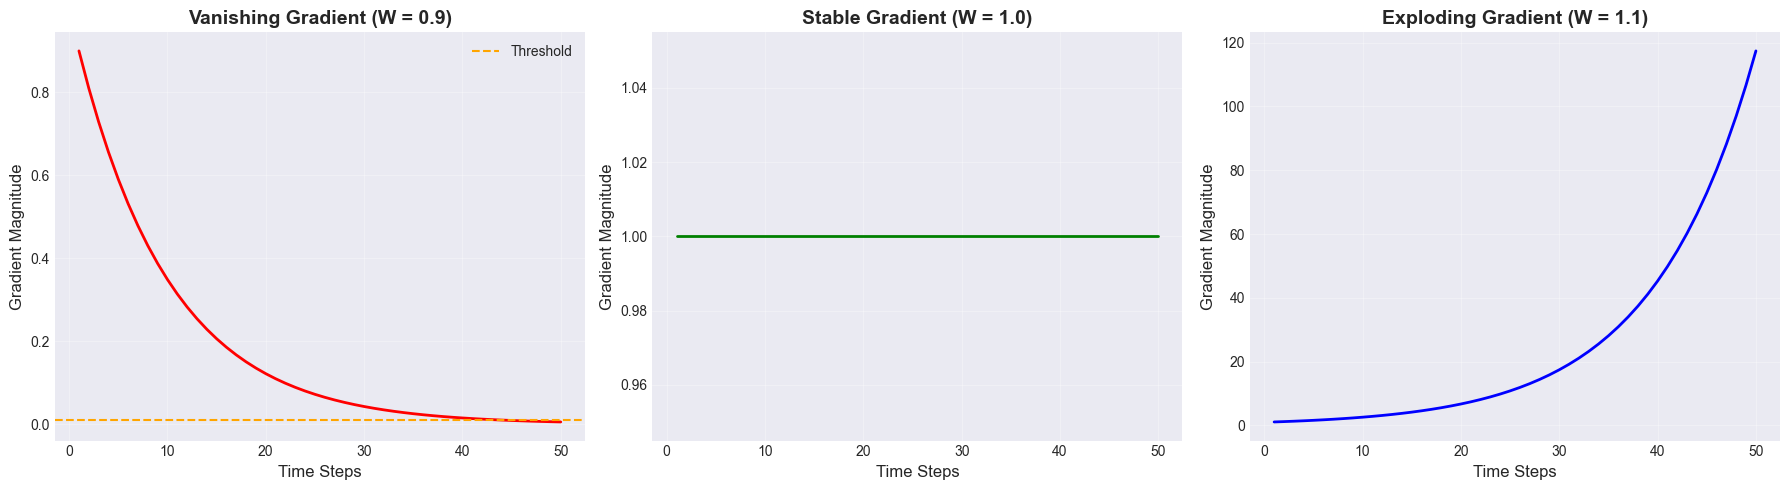


Visualization saved as 'gradient_flow.png'
RED: Gradient vanishes to 0
GREEN: Gradient stays constant
BLUE: Gradient explodes to infinity


In [3]:
# ==============================================================================
# VISUALIZATION 1: Gradient Flow Over Time
# ==============================================================================

print("\n2. VISUALIZING GRADIENT FLOW")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Vanishing
W_vanish = 0.9
vanish_gradients = compute_repeated_multiplication(W_vanish, num_steps)
axes[0].plot(range(1, num_steps + 1), vanish_gradients, 'r-', linewidth=2)
axes[0].set_title(f'Vanishing Gradient (W = {W_vanish})', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Time Steps', fontsize=12)
axes[0].set_ylabel('Gradient Magnitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0.01, color='orange', linestyle='--', label='Threshold')
axes[0].legend()

# Stable
W_stable = 1.0
stable_gradients = compute_repeated_multiplication(W_stable, num_steps)
axes[1].plot(range(1, num_steps + 1), stable_gradients, 'g-', linewidth=2)
axes[1].set_title(f'Stable Gradient (W = {W_stable})', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time Steps', fontsize=12)
axes[1].set_ylabel('Gradient Magnitude', fontsize=12)
axes[1].grid(True, alpha=0.3)

# Exploding
W_explode = 1.1
explode_gradients = compute_repeated_multiplication(W_explode, num_steps)
axes[2].plot(range(1, num_steps + 1), explode_gradients, 'b-', linewidth=2)
axes[2].set_title(f'Exploding Gradient (W = {W_explode})', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Time Steps', fontsize=12)
axes[2].set_ylabel('Gradient Magnitude', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gradient_flow.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nVisualization saved as 'gradient_flow.png'")
print("RED: Gradient vanishes to 0")
print("GREEN: Gradient stays constant")
print("BLUE: Gradient explodes to infinity")


3. MEMORY RETENTION ANALYSIS
------------------------------------------------------------


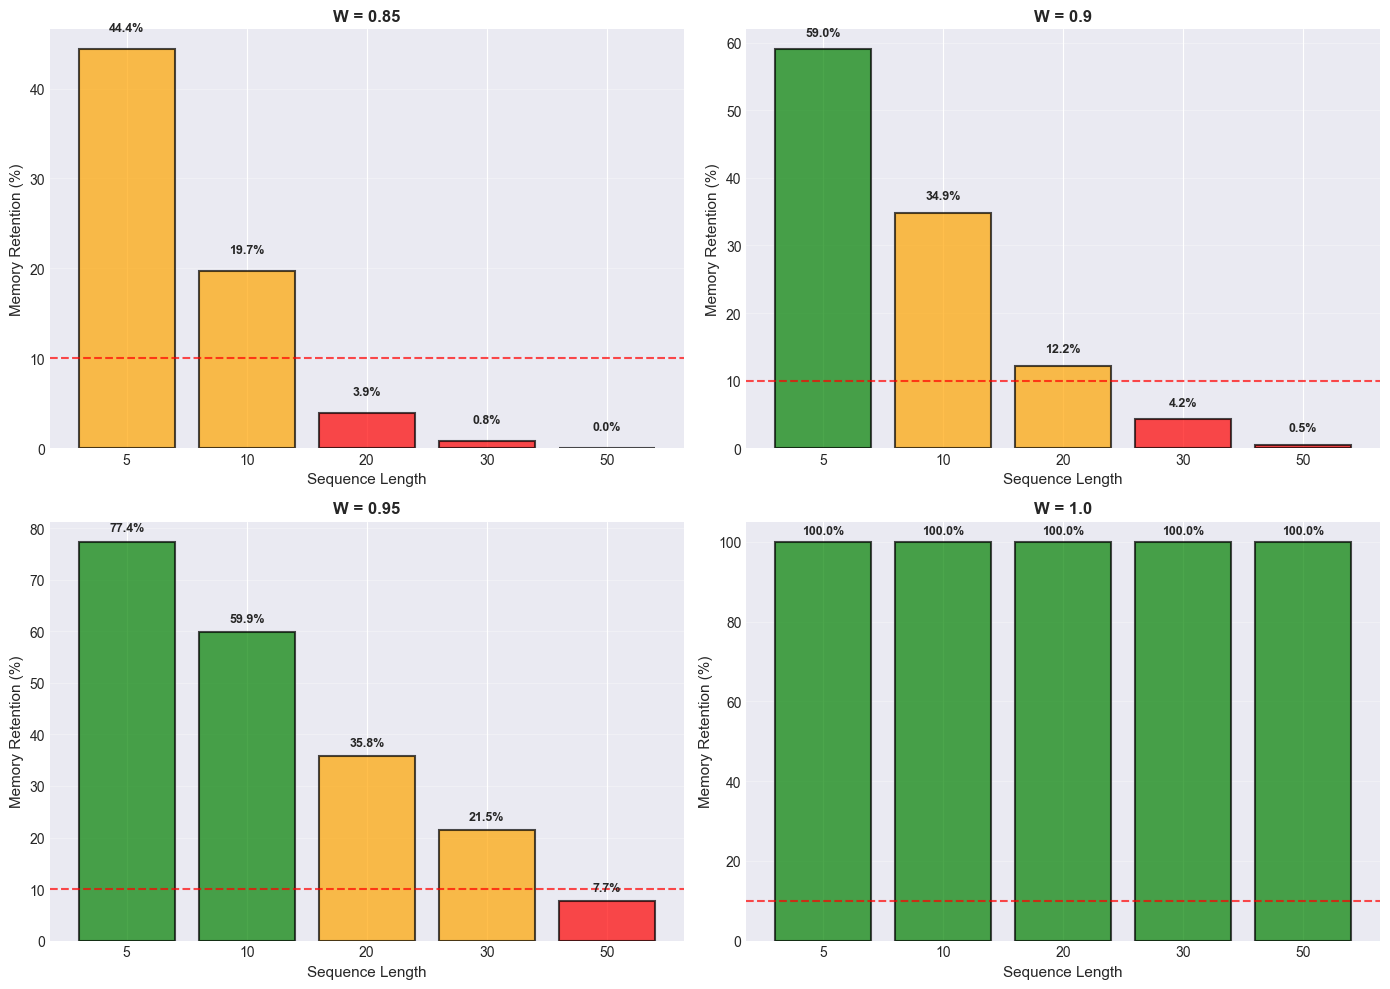


Visualization saved as 'memory_retention.png'
Green: Good retention (>50%)
Orange: Moderate retention (10-50%)
Red: Poor retention (<10%)


In [4]:
# ==============================================================================
# SECTION 2: Memory Retention Over Distance
# ==============================================================================

print("\n3. MEMORY RETENTION ANALYSIS")
print("-" * 60)

def demonstrate_memory_loss():
    """Show how RNN forgets over long sequences"""
    sequence_lengths = [5, 10, 20, 30, 50]
    W_values = [0.85, 0.9, 0.95, 1.0]
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()
    
    for idx, W in enumerate(W_values):
        memory_retention = []
        
        for seq_len in sequence_lengths:
            retention = W ** seq_len
            memory_retention.append(retention * 100)
        
        colors = ['green' if r > 50 else 'orange' if r > 10 else 'red' 
                 for r in memory_retention]
        
        axes[idx].bar(range(len(sequence_lengths)), memory_retention, 
                     color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
        
        axes[idx].set_xlabel('Sequence Length', fontsize=11)
        axes[idx].set_ylabel('Memory Retention (%)', fontsize=11)
        axes[idx].set_title(f'W = {W}', fontsize=12, fontweight='bold')
        axes[idx].set_xticks(range(len(sequence_lengths)))
        axes[idx].set_xticklabels(sequence_lengths)
        axes[idx].axhline(y=10, color='red', linestyle='--', alpha=0.7)
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        for i, v in enumerate(memory_retention):
            axes[idx].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('memory_retention.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nVisualization saved as 'memory_retention.png'")
    print("Green: Good retention (>50%)")
    print("Orange: Moderate retention (10-50%)")
    print("Red: Poor retention (<10%)")

demonstrate_memory_loss()



4. RNN vs LSTM: WHY LSTM SOLVES THE PROBLEM
------------------------------------------------------------


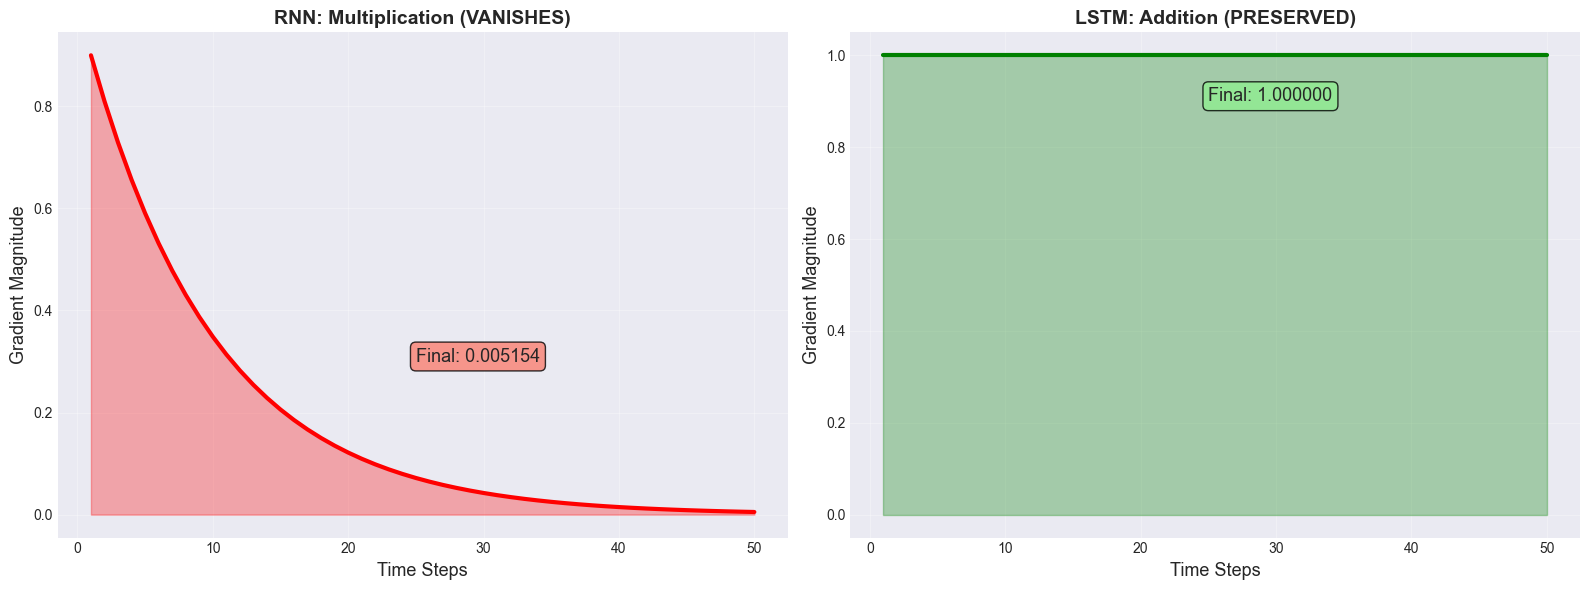


Visualization saved as 'rnn_vs_lstm.png'

KEY INSIGHT:
  RNN: gradient *= W (repeated) -> vanishes
  LSTM: gradient += updates -> preserved!

This is WHY LSTM solves the vanishing gradient problem!


In [5]:
# ==============================================================================
# SECTION 3: RNN vs LSTM Comparison
# ==============================================================================

print("\n4. RNN vs LSTM: WHY LSTM SOLVES THE PROBLEM")
print("-" * 60)

def compare_rnn_lstm(num_steps=50):
    """Compare gradient flow: multiplication vs addition"""
    
    # RNN: Multiplication
    W = 0.9
    rnn_gradients = [W ** t for t in range(1, num_steps + 1)]
    
    # LSTM: Addition (simplified - gradient flows unchanged)
    lstm_gradients = [1.0] * num_steps
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # RNN
    ax1.plot(range(1, num_steps + 1), rnn_gradients, 'r-', linewidth=3)
    ax1.fill_between(range(1, num_steps + 1), rnn_gradients, alpha=0.3, color='red')
    ax1.set_xlabel('Time Steps', fontsize=13)
    ax1.set_ylabel('Gradient Magnitude', fontsize=13)
    ax1.set_title('RNN: Multiplication (VANISHES)', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.text(25, 0.3, f'Final: {rnn_gradients[-1]:.6f}', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='salmon', alpha=0.8))
    
    # LSTM
    ax2.plot(range(1, num_steps + 1), lstm_gradients, 'g-', linewidth=3)
    ax2.fill_between(range(1, num_steps + 1), lstm_gradients, alpha=0.3, color='green')
    ax2.set_xlabel('Time Steps', fontsize=13)
    ax2.set_ylabel('Gradient Magnitude', fontsize=13)
    ax2.set_title('LSTM: Addition (PRESERVED)', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.text(25, 0.9, f'Final: {lstm_gradients[-1]:.6f}', fontsize=13,
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('rnn_vs_lstm.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\nVisualization saved as 'rnn_vs_lstm.png'")
    print("\nKEY INSIGHT:")
    print("  RNN: gradient *= W (repeated) -> vanishes")
    print("  LSTM: gradient += updates -> preserved!")
    print("\nThis is WHY LSTM solves the vanishing gradient problem!")

compare_rnn_lstm()


In [7]:
# ==============================================================================
# SECTION 4: Self-Check Quiz
# ==============================================================================

print("\n5. SELF-CHECK QUIZ")
print("=" * 60)

quiz_questions = [
    ("Q1: If W = 0.85, after 50 steps the gradient will:", "a) Vanish"),
    ("Q2: Vanishing gradients happen when:", "b) W < 1"),
    ("Q3: LSTM solves this by:", "b) Using addition"),
    ("Q4: After 50 steps with W=1.1:", "b) Exploded"),
    ("Q5: RNN struggles with long sentences because:", "b) Forgets due to vanishing gradients")
]

print("\nAnswers:")
for q, a in quiz_questions:
    print(f"{q}")
    print(f"  Answer: {a}")


5. SELF-CHECK QUIZ

Answers:
Q1: If W = 0.85, after 50 steps the gradient will:
  Answer: a) Vanish
Q2: Vanishing gradients happen when:
  Answer: b) W < 1
Q3: LSTM solves this by:
  Answer: b) Using addition
Q4: After 50 steps with W=1.1:
  Answer: b) Exploded
Q5: RNN struggles with long sentences because:
  Answer: b) Forgets due to vanishing gradients


In [9]:
# ==============================================================================
# SECTION 5: Summary
# ==============================================================================

print("\n" + "=" * 60)
print("SUMMARY: KEY TAKEAWAYS")
print("=" * 60)

summary = """
1. VANISHING GRADIENT CAUSE:
   - W < 1 causes VANISHING (0.9^50 = 0.005)
   - W > 1 causes EXPLODING (1.1^50 = 117.4)

2. WHY IT'S A PROBLEM:
   - Can't learn from early time steps
   - Forgets long-term dependencies
   - Fails on complex sentences

3. LSTM SOLUTION:
   - Uses ADDITION instead of MULTIPLICATION
   - Cell state = gradient highway
   - Can remember 100+ steps

4. MATHEMATICAL INSIGHT:
   - RNN: gradient proportional to W^n (vanishes)
   - LSTM: gradient += updates (preserved)
"""

print(summary)

print("\n" + "=" * 60)
print("CONGRATULATIONS!")
print("=" * 60)
print("\nYou now understand:")
print("  - Why W < 1 causes vanishing (NOT W > 1)")
print("  - How to visualize the problem")
print("  - Why LSTM is the solution")



SUMMARY: KEY TAKEAWAYS

1. VANISHING GRADIENT CAUSE:
   - W < 1 causes VANISHING (0.9^50 = 0.005)
   - W > 1 causes EXPLODING (1.1^50 = 117.4)

2. WHY IT'S A PROBLEM:
   - Can't learn from early time steps
   - Forgets long-term dependencies
   - Fails on complex sentences

3. LSTM SOLUTION:
   - Uses ADDITION instead of MULTIPLICATION
   - Cell state = gradient highway
   - Can remember 100+ steps

4. MATHEMATICAL INSIGHT:
   - RNN: gradient proportional to W^n (vanishes)
   - LSTM: gradient += updates (preserved)


CONGRATULATIONS!

You now understand:
  - Why W < 1 causes vanishing (NOT W > 1)
  - How to visualize the problem
  - Why LSTM is the solution
